# **Sendy Logistics Challenge: EDSA**
### **Team1**


# **Introduction**

This notebook consists of our attempt at the Sendy Logistics Challenge on https://zindi.africa/.

We will be training a regression model that will be used to predict the estimated time of arrival for motorbike deliveries in Kenya-Nairobi, from explanatory features. In this notebook, we go through the whole process of creating a machine learning model based on the dataset provided by Sendy found on https://zindi.africa/hackathons/edsa-2021-sendy-logistics-challenge/data, which consists of order details and rider metrics based on orders made on the Sendy platform.

Our main challenge is to predict the estimated time of arrival for orders - from pick-up to drop-off.

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://cdn1.vc4a.com/media/2015/12/Sendy-delivery-900x322.jpg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>



# **Notebook Outline**

    0. Installations
    1. Libraries and Data importing
        1.1 Importing Libraries
        1.2 Importing Data
    2. Data Preprocessing
        2.1 Data Overview
        2.2 Columns Alignment
        2.3 Combining the Dataset
        2.4 Merging Dataframe with Rider's details
        2.5 Summary Statistics
        2.6 Addressing Missing Values
            2.6.1 Droping Precipitation_in_millimeters columns
            2.6.2 Replacing missing values in Temperature with mean
            2.6.3 Confirming the Null Values
    3. Exploratory Data Analysis
        3.1 Examining the target variable
        3.2 Distribution of Temperature of the Combined Dataset (Train and Test)
        3.3 Distribution of Platform Type and Business/Personal against Distance (km)
        3.4 Frequency of Business/Personal by Platform Type
        3.5 Distribution of Time of Order from Pickup to Destination
            3.5.1 Defining a function that checks for the day of pickup
            3.5.2 Plot of Weekly Distribution of Orders Within the Month
            3.5.3 Plot of Daily Distribution of Orders Within a Month
            3.5.4 Defining a function that checks for the day of pickup
            3.5.5 Plot of Weekly Distribution
            3.5.6 Defining a function that checks for period in the day of pickup
            3.5.7 Chart of Distribution of Order Pickup by Period of the Day
        3.6 Addressing Outliers
    4. Feature Engineering and Selection
        4.1 Converting Objects to Datetime
        4.2 Creating new variables
            4.2.1 Calculting Difference of Time (in seconds)
            4.2.2 Calculating Performance of Riders
        4.3 Cyclical Features
        4.4 Checking for Multicollinearity
        4.5 Dropping co-linear and unwanted variables
        4.6 Dummying out the last categorical column
            4.6.1 Scaling of dataset
        4.7 Splitting our dataset again into Train and Validation Test
    5. Model Fitting
        5.1 Linear Regression
        5.2 Lasso Regression
        5.3 Ridge Regression
        5.4 Decision Tree
        5.5 Random Forest
        5.6 Catboost
        5.7 XGBoost
    6. Model Evaluation
        6.1 Linear Regression
        6.2 Lasso Regression
        6.3 Ridge Regression
        6.4 Decision Tree
        6.5 Random Forest
        6.6 Catboost
        6.7 XGBoost
    7. Model Analysis
        7.1 Linear Regression
        7.2 Lasso Regression
        7.3 Ridge Regression
        7.4 Decision Tree
        7.5 Random Forest
        7.6 Catboost
        7.7 XGBoost
    8. Conclusion
    9. Contributors
    10.References

# **0. Installations**

In [ ]:
!pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xgboost


In [ ]:
!pip install catboost


# **1. Libraries and Data importing**

## **1.1 Importing Libraries**

 Import Python libraries

In [157]:
import numpy as np
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # data visualization
import missingno as msno
import xgboost as xgb
from scipy.stats import norm
from catboost import CatBoostRegressor
import pandas.util.testing as tm

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


## **1.2 Importing Data**

We will load our data as a Pandas DataFrame

In [158]:
test_df = pd.read_csv('data\Test.csv')
train_df = pd.read_csv('data\Train.csv')
riders_df = pd.read_csv('data\Riders.csv')


# **2 Data Preprocessing**

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed in order to bring it to such a state that the features of the data can now be easily interpreted by the algorithm.
In this section, we made use of data preprocessing techniques as it is the first step in any machine learning process.

## **2.1 Dataset Overview**

In [5]:
train_df.head(2)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [6]:
test_df.head(2)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868


In [7]:
riders_df.head(2)


,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


In [8]:
train_df.shape


(21201, 29)

In [9]:
test_df.shape

(7068, 25)

In [10]:
riders_df.shape


(960, 5)

## 2.2 Columns Alignment

The train dataset has 29 features while test dataset has 25 features, it is important to have equal number of variables in both train and test dataset because we are training a machine model to identify patterns in our (training) data. If we later incorporate data it has never encountered before it has no idea what to do with it.

The code below is making sure that the train and test data sets have equal columns.

In [159]:
# getting a list of the test columns
testcols = test_df.columns
# Refining the train columns to align to test columns
newtrain = train_df[testcols]
# assigning the target variable
y_target = np.array(train_df["Time from Pickup to Arrival"]).reshape(-1, 1)


In [12]:
print(newtrain.columns)
print(test_df.columns)


Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at 

## 2.3 Combining the dataset

We combined the test and train dataset to avoid duplication of tasks when we are cleaning our data or creating new features. Data leakage will be avoided as later we will randomly split our data into training and testing data. 70% of the data will go to training and 30% will go to testing. In this way there won't be any information accidentally shared between the test and training dataset.

In [160]:
df = pd.concat([newtrain, test_df])
df.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,5,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,5,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,2,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,5,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,1,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770


In [17]:
df.shape


(28269, 25)

## 2.4 Merging Dataframe with Rider's details

We merged the riders dataset with the dataframe that we have created by joining train and test datasets. By joining riders data to our dataframe, we are adding new feature to our dataset which might help with the model training and performance.

In [161]:
df = df.merge(riders_df, how='left', on='Rider Id')


In [19]:
df.head(2)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,396,339,13.6,69



**Some of the columns have white spaces that we want to replace with an underscore (to avoid using the column names as variable names later on).**

In [162]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()


,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,2311,872,14.1,533


In [21]:
df.columns


Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

## **2.5 Summary Statistics**

In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 28268
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order_No                              28269 non-null  object 
 1   User_Id                               28269 non-null  object 
 2   Vehicle_Type                          28269 non-null  object 
 3   Platform_Type                         28269 non-null  int64  
 4   Personal_or_Business                  28269 non-null  object 
 5   Placement_-_Day_of_Month              28269 non-null  int64  
 6   Placement_-_Weekday_(Mo_=_1)          28269 non-null  int64  
 7   Placement_-_Time                      28269 non-null  object 
 8   Confirmation_-_Day_of_Month           28269 non-null  int64  
 9   Confirmation_-_Weekday_(Mo_=_1)       28269 non-null  int64  
 10  Confirmation_-_Time                   28269 non-null  object 
 11  Arrival_at_Pick

- The train_df.info() outputs the number of non-null entries in each column. As such, we are certain that our data has missing values in **Temperature** and **Precipitation_in_millimeters** columns as the columns have a varying number of non-null entries.

- All input data for regression model building purposes needs to be numerical. All time columns, Order_No, User_Id, Vehicle_Type, Business_or_Personal columns are not numerical. We therefore have to transform the text data into numbers before we can train our machine learning model.

Now let's look at a table showing the summary statistics of the data.

In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Platform_Type,28269.0,2.752167,0.624872,1.000000,3.000000,3.000000,3.000000,4.000000
Placement_-_Day_of_Month,28269.0,15.645725,8.793210,1.000000,8.000000,15.000000,23.000000,31.000000
Placement_-_Weekday_(Mo_=_1),28269.0,3.242527,1.570692,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival_at_Pickup_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival_at_Pickup_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup_-_Day_of_Month,28269.0,15.645831,8.793188,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup_-_Weekday_(Mo_=_1),28269.0,3.242633,1.570642,1.000000,2.000000,3.000000,5.000000,7.000000
Distance_(KM),28269.0,9.494641,5.645726,1.000000,5.000000,8.000000,13.000000,49.000000


Based on the **means** and **standard deviations** of different columns, we may consider **standardizing** our data.

## 2.6  Addressing Missing Values

Machine models can not handle missing data and a solution to that is to replace missing values with another value of the these three (mean, median or mode).

Pandas provide functions to test the amount of missing values within the dataset. Missingno library takes it one step further and provides the distribution of missing values within the dataset by informative visualizations. Using the plots of missingno, we are able to see where the missing values are located in each column and if there's a correlation between missing values of various columns.

Before handling missing values, it is very important to explore them in the dataset. 

In [24]:
df.isnull().sum()


Order_No                                    0
User_Id                                     0
Vehicle_Type                                0
Platform_Type                               0
Personal_or_Business                        0
Placement_-_Day_of_Month                    0
Placement_-_Weekday_(Mo_=_1)                0
Placement_-_Time                            0
Confirmation_-_Day_of_Month                 0
Confirmation_-_Weekday_(Mo_=_1)             0
Confirmation_-_Time                         0
Arrival_at_Pickup_-_Day_of_Month            0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)        0
Arrival_at_Pickup_-_Time                    0
Pickup_-_Day_of_Month                       0
Pickup_-_Weekday_(Mo_=_1)                   0
Pickup_-_Time                               0
Distance_(KM)                               0
Temperature                              5803
Precipitation_in_millimeters            27518
Pickup_Lat                                  0
Pickup_Long                       

**The Matrix:**

Using matrix we can  quickly find the pattern of missingness in the dataset.

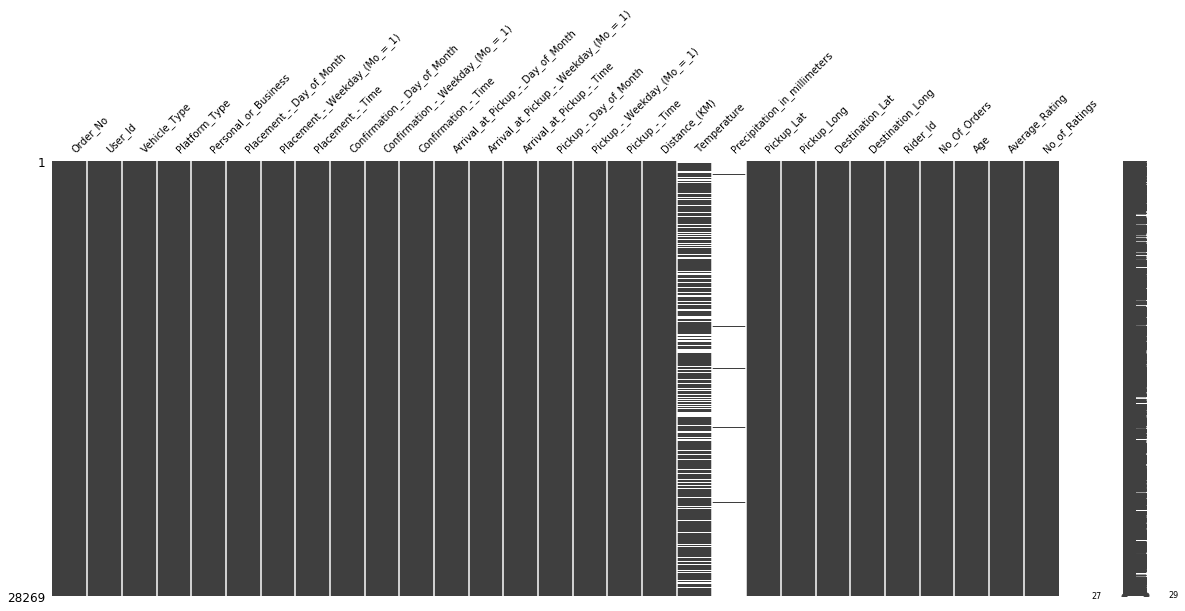

In [25]:
msno.matrix(df, figsize=(20, 8), fontsize=10)
plt.show()


The plot above shows the amount and positions of missing values. The idea is to capture not only missing values, but also data sparsity. Temparature and Precipitation_in millimeters have some missing values while there is no pattern detected from the missing values of these two columns.

### 2.6.1 Droping Precipitation_in_millimeters columns

In [163]:
df.drop(['Precipitation_in_millimeters'], axis=1, inplace=True)


In [27]:
df.isnull().sum()


Order_No                                   0
User_Id                                    0
Vehicle_Type                               0
Platform_Type                              0
Personal_or_Business                       0
Placement_-_Day_of_Month                   0
Placement_-_Weekday_(Mo_=_1)               0
Placement_-_Time                           0
Confirmation_-_Day_of_Month                0
Confirmation_-_Weekday_(Mo_=_1)            0
Confirmation_-_Time                        0
Arrival_at_Pickup_-_Day_of_Month           0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)       0
Arrival_at_Pickup_-_Time                   0
Pickup_-_Day_of_Month                      0
Pickup_-_Weekday_(Mo_=_1)                  0
Pickup_-_Time                              0
Distance_(KM)                              0
Temperature                             5803
Pickup_Lat                                 0
Pickup_Long                                0
Destination_Lat                            0
Destinatio

### 2.6.2 Replacing missing values in Temperature with mean

In [164]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())


### 2.6.3 Confirming the Null Values

In [29]:
df.isnull().sum()


Order_No                                0
User_Id                                 0
Vehicle_Type                            0
Platform_Type                           0
Personal_or_Business                    0
Placement_-_Day_of_Month                0
Placement_-_Weekday_(Mo_=_1)            0
Placement_-_Time                        0
Confirmation_-_Day_of_Month             0
Confirmation_-_Weekday_(Mo_=_1)         0
Confirmation_-_Time                     0
Arrival_at_Pickup_-_Day_of_Month        0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)    0
Arrival_at_Pickup_-_Time                0
Pickup_-_Day_of_Month                   0
Pickup_-_Weekday_(Mo_=_1)               0
Pickup_-_Time                           0
Distance_(KM)                           0
Temperature                             0
Pickup_Lat                              0
Pickup_Long                             0
Destination_Lat                         0
Destination_Long                        0
Rider_Id                          

# **3. Exploratory Data Analysis**

Exploratory data analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling task.

## 3.1 Examining the target variable

In [165]:
train_shape = train_df.shape[0]
train_shape


21201

In [166]:
y = y_target
df_y = pd.DataFrame(y)
df_y.columns = ["Time from Pickup to Arrival"]


In [167]:
df_y.isnull().sum()


Time from Pickup to Arrival    0
dtype: int64

In [168]:
df_y.describe()


,Time from Pickup to Arrival
count,21201.000000
mean,1556.920947
std,987.270788
min,1.000000
25%,882.000000
50%,1369.000000
75%,2040.000000
max,7883.000000


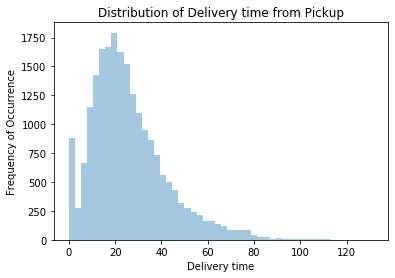

In [169]:
# plot histogram

# convert the target variable to minutes
target_mins = train_df[:train_shape]['Time from Pickup to Arrival'] / 60
# plotting the histogram of the dataset
sns.distplot(target_mins, kde=False, bins=50)
plt.title("Distribution of Delivery time from Pickup")
# providing label to the x axis
plt.xlabel("Delivery time")
#  providing label to the y-axis
plt.ylabel("Frequency of Occurrence")
# show graph
plt.show()


Observation

From the above graph it is observed that delivery times are positively skewed (skewed to the right). It can also be seen that most of the deliveries that were done are between 0 and about 50 mins.

However, it is seen that there are deliveries between 0 and 1 mins, therefore these needs to be investigated further.

In [170]:
# Checking validity of the records with time from pickup to arrival below 60
below_one_min = train_df[train_df['Time from Pickup to Arrival'] < 60]
below_one_min[['Placement - Time', 'Confirmation - Time',
               'Arrival at Pickup - Time', 'Pickup - Time',
               'Arrival at Destination - Time',
               'Distance (KM)',
               'Time from Pickup to Arrival']].head(10)


,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Time from Pickup to Arrival
36,11:47:23 AM,1:01:54 PM,1:02:08 PM,1:35:48 PM,1:35:50 PM,4,2
52,4:16:05 PM,4:16:23 PM,5:10:03 PM,5:14:41 PM,5:14:45 PM,3,4
81,11:44:46 AM,1:31:36 PM,1:32:02 PM,1:51:06 PM,1:51:20 PM,5,14
86,1:00:31 PM,1:00:50 PM,1:18:47 PM,1:47:23 PM,1:47:27 PM,4,4
126,12:41:58 PM,12:48:50 PM,1:09:15 PM,1:23:54 PM,1:24:10 PM,4,16
159,12:17:13 PM,12:17:25 PM,12:18:27 PM,12:56:29 PM,12:56:49 PM,10,20
168,10:41:06 AM,10:47:00 AM,11:14:51 AM,11:39:13 AM,11:39:21 AM,5,8
263,11:14:51 AM,11:15:14 AM,11:18:00 AM,11:27:34 AM,11:27:47 AM,3,13
301,4:06:20 PM,4:17:35 PM,4:52:31 PM,5:18:12 PM,5:18:14 PM,9,2
304,12:52:42 PM,12:52:55 PM,12:54:16 PM,1:10:39 PM,1:10:51 PM,1,12


**Checking the distribution of the deliveries that are less than 60 seconds**

It can be seen in the chart below that the number of deliveries that falls below 30 seconds are quite a lot. These records call for questioning. Sendy ought to verify the authenticity of these records (since we are dealing with bike deliveries)

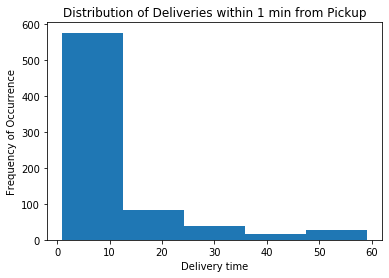

In [171]:
# Plotting the distribution of the records

# plotting histogram of deliveries made within 60 seconds
below_one_min['Time from Pickup to Arrival'].hist(bins=5, grid=False)
# title of the graph
plt.title("Distribution of Deliveries within 1 min from Pickup")
# providing label to the x axis
plt.xlabel("Delivery time")
#  providing label to the y-axis
plt.ylabel("Frequency of Occurrence")
# show graph
plt.show()


## 3.2 Distribution of Temperature of the Combined Dataset (Train and Test)

The distribution looks normal and it is observed that most of the temperature during deliveries are within 20 degrees and 27.5 degrees

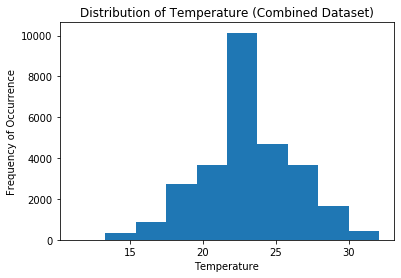

In [172]:
# plotting histogram of temperature after imputation
df['Temperature'].hist(grid=False)
# defining the title of the graph
plt.title("Distribution of Temperature (Combined Dataset)")
# providing label to the x axis
plt.xlabel("Temperature")
#  providing label to the y-axis
plt.ylabel("Frequency of Occurrence")
# show graph
plt.show()


## 3.3 Distribution of Platform Type and Business/Personal against Distance (km)



<Figure size 1296x360 with 0 Axes>

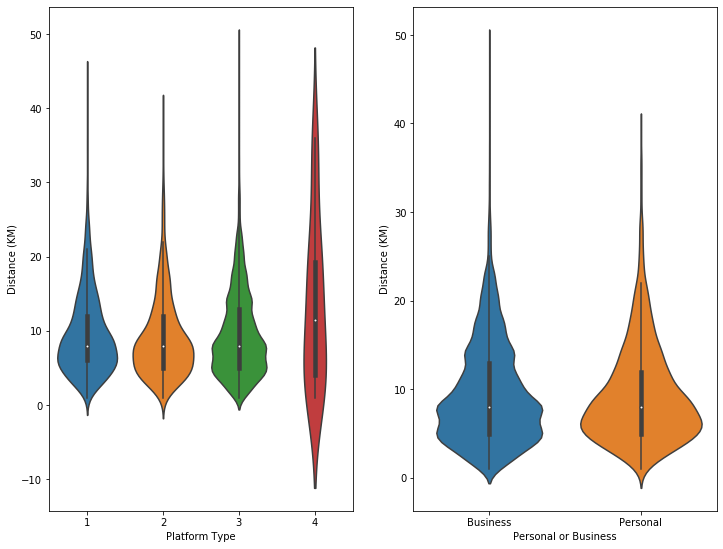

In [173]:
plt.figure(figsize=(18, 5))
figure, axes = plt.subplots(1, 1, figsize=(10, 16), sharey='row')
figure.tight_layout()
plt.subplot(2, 2, 1)
sns.violinplot(x='Platform Type', y='Distance (KM)', data=train_df, size=20)
plt.subplot(2, 2, 2)
sns.violinplot(x='Personal or Business', y='Distance (KM)',
                 data=train_df, size=20)
plt.show()


## 3.4 Frequency of Business/Personal by Platform Type

**Observation**

Most of the orders made were done by Business customers on Platform Type 3. Few orders were made by Personal customers while the least orders were made by Business customers on Platform Type 1, 2 and 4.

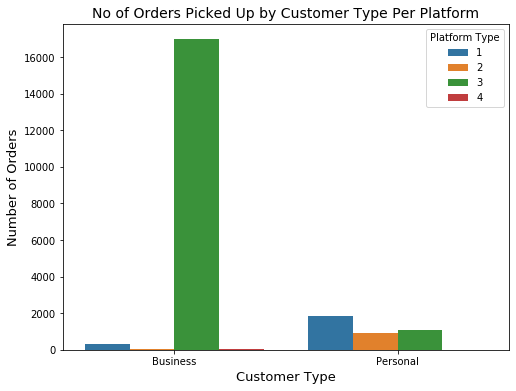

In [174]:
# defining the size of the graph
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# plotting the chart
sns.countplot(x="Personal or Business", hue="Platform Type", data=train_df)
# defining legend for platform type
plt.legend(loc=1, title="Platform Type")
sns.set_style(style=None, rc=None)
# providing label to the x axis
plt.xlabel('Customer Type', fontsize=13)
# providing label to the y axis
plt.ylabel('Number of Orders', fontsize=13)
# providing label to the title of the graph
plt.title('No of Orders Picked Up by Customer Type Per Platform', fontsize=14)
# Show the plot
plt.show()


## 3.5 Distribution of Time of Order from Pickup to Destination

### 3.5.1 Defining a function that checks for the day of pickup

In [175]:
def day(x):
    '''
    The function returns the day of the week.
    It returns Monday if weekday is 1,Tuesday if weekday is 2,
    Wednesday if weekday is 3, Thursday if weekday is 4,
    Friday if weekday is 5, Saturday if weekday is 6,
    and Sunday if weekday is 7
    
    Parameter:
        Series
    
    Returns:
        Returns a string
    '''
    if x == 1:
        return 'Monday'
    elif x == 2:
        return 'Tuesday'
    elif x == 3:
        return 'Wednesday'
    elif x == 4:
        return 'Thursday'
    elif x == 5:
        return 'Friday'
    elif x == 6:
        return 'Saturday'
    else:
        return 'Sunday'


In [176]:
# Creating a new column to store the days where orders were picked up by riders
df_chart = df
df_chart['Day_of_Week'] = df_chart['Pickup_-_Weekday_(Mo_=_1)'].apply(day)


### 3.5.2 Plot of Weekly Distribution of Orders Within the Month

**Observation**

From the below, it was observed that the number of orders picked up by riders were the highest during the business working days (Monday to Friday) while Sunday has the least number of orders.

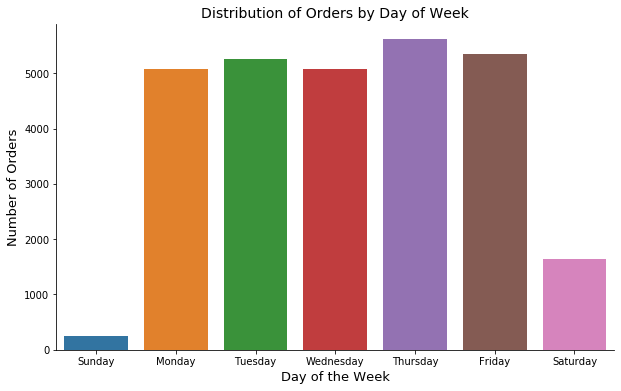

In [177]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
sns.countplot(x='Day_of_Week', data=df_chart, order=['Sunday', 'Monday',
              'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Day of the Week', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)
plt.title('Distribution of Orders by Day of Week', fontsize=14)
# Hide the right and top spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show the plot
plt.show()


### 3.5.3 Plot of Daily Distribution of Orders Within a Month

**Observation**

The chart below shows high volume of orders during the first week though quite low on the first (1st) day of the month while it decreases a little in the second week. This decline continues until the last week of the month where there is a slight increase but suddenly decline at the end of the month (31st). This could be as a result of business not wanting to place orders during the end or beginning of the month as it is the busiest time of the month when majority of workers recently got paid. This is a way of them avoiding traffic.

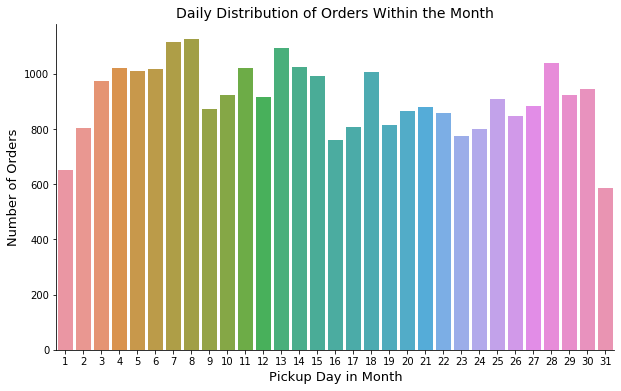

In [178]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
sns.countplot(x='Pickup_-_Day_of_Month', data=df_chart)
plt.xlabel('Pickup Day in Month', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)
plt.title('Daily Distribution of Orders Within the Month', fontsize=14)
# Hide the right and top spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show the plot
plt.show()


### 3.5.4 Defining a function that checks for the day of pickup

In [179]:
def week(x):
    '''
    The function returns the week number within the month that
    deliveries were made.
    
    Parameter:
        Series
    
    Returns:
        Returns a string
    '''
    if x in np.arange(8):
        return 'Week 1'
    elif x in np.arange(8, 15):
        return 'Week 2'
    elif x in np.arange(15, 22):
        return 'Week 3'
    elif x in np.arange(22, 29):
        return 'Week 4'
    else:
        return 'Week 5'


In [180]:
# Applying the week function to the pickup day within the month
df_chart['Week'] = df_chart['Pickup_-_Day_of_Month'].apply(week)


### 3.5.5 Plot of Weekly Distribution

**Observation**

From the below, it was observed that Week 2 has the highest number of orders picked up by riders followed by Week 1. Week 5 has the least (this can be attributed to the fact that Week 5 has only 3 days within the week).

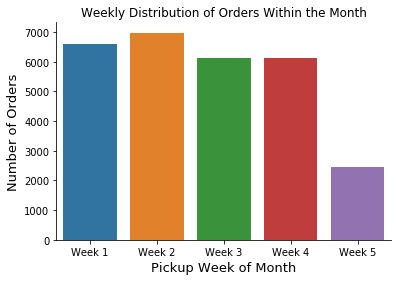

In [181]:
plt.figure()
ax = plt.subplot(111)

sns.countplot(x='Week', data=df_chart, order=['Week 1', 'Week 2',
              'Week 3', 'Week 4', 'Week 5'])

plt.xlabel('Pickup Week of Month', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)
plt.title('Weekly Distribution of Orders Within the Month')

# Hide the right and top spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show the plot
plt.show()


### 3.5.6 Defining a function that checks for period in the day of pickup

In [182]:
def period_in_day(x):
    '''
    The function returns the period in day that
    deliveries were made.
    
    Parameter:
        Series
    
    Returns:
        Returns a string
    '''
    if (x > 4) and (x < 12):
        return 'Morning'
    elif (x >= 12) and (x <= 17):
        return 'Afternoon'
    elif (x > 17) and (x < 21):
        return'Evening'
    elif (x >= 21) and (x <= 23):
        return'Night'
    else:
        return 'Midnight'


In [184]:
df_chart['Pickup_Hour'] = pd.to_datetime(df_chart['Pickup_-_Time']).dt.hour
df_chart['Period_of_the_Day'] = df_chart['Pickup_Hour'].apply(period_in_day)


### 3.5.7 Chart of Distribution of Order Pickup by Period of the Day

**Observation**

From the below, it was observed that most orders picked up by riders were done in the Afternoon and followed by Morning. Few orders were picked up in the Evening. Riders hardly pick up orders in the Night. Traffic could impact the time of delivery of orders since these orders were mostly picked up in the morning and afternoon.

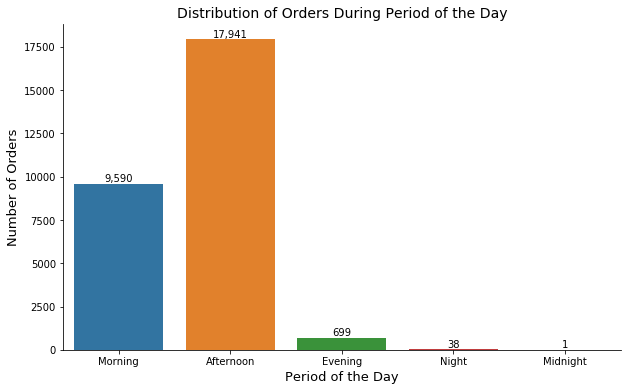

In [186]:
plt.figure(figsize=(10, 6))
ncount = len(df_chart['Period_of_the_Day'])
ax = sns.countplot(x='Period_of_the_Day', data=df_chart)
plt.xlabel('Period of the Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)
plt.title('Distribution of Orders During Period of the Day', fontsize=14)

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    # set the alignment of the text
    ax.annotate(format(y, ',.0f'), (x.mean(), y), ha='center', va='bottom')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()


In [187]:
df.drop(['Day_of_Week', 'Week', 'Period_of_the_Day'], axis=1, inplace=True)

## **3.6 Addressing Outliers**

Outlier is an observation point that is distant from other observations. Box-plot are useful for viewing outliers. An outlier is defined as a data point that is located outside the whiskers of the box plot.

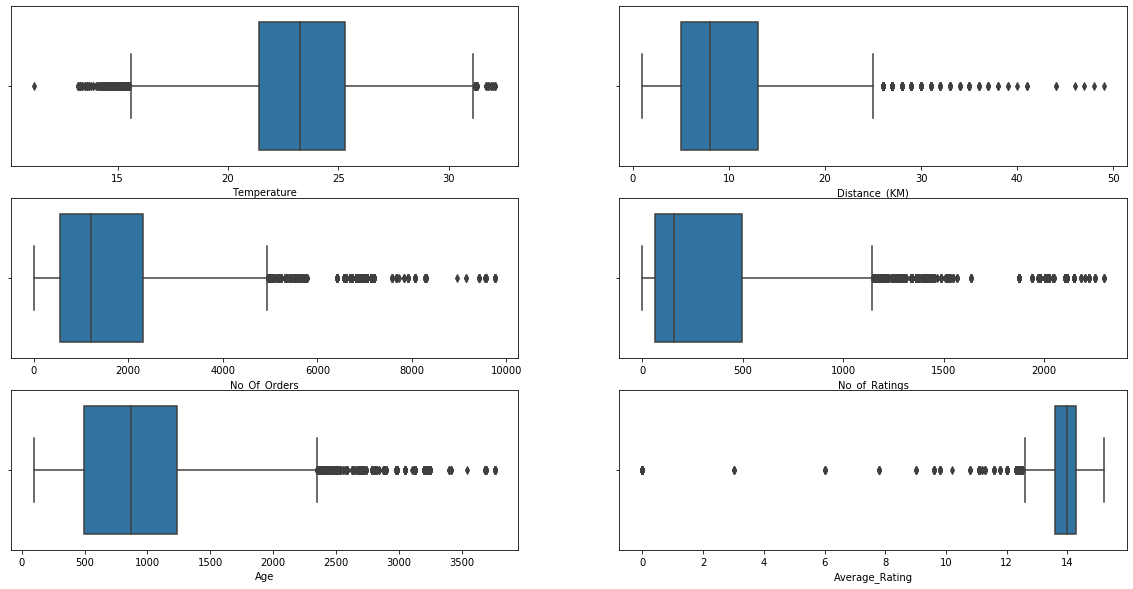

In [188]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
sns.boxplot(df['Temperature'], ax=ax[0][0])
sns.boxplot(df['Distance_(KM)'], ax=ax[0][1])
sns.boxplot(df['No_Of_Orders'], ax=ax[1][0])
sns.boxplot(df['No_of_Ratings'], ax=ax[1][1])
sns.boxplot(df['Age'], ax=ax[2][0])
sns.boxplot(df['Average_Rating'], ax=ax[2][1])
plt.show()


The majority of our numerical datasets contain outliers. It is crucial to understand that not all outliers are due to data handling error, others can be very informative about the subject area. Looking at the Age diagram, it is important to understand that these outliers might be caused by the fact that the rider has been doing that for some time compared to someone who started yesterday. The outliers on Age might affect the No_of_oders, No_of_ratings, Average_Ranting. The outliers of temperature and distance are quite understandable. Temperature might be affected by climate change and no one has control over that.

**Remove or not to remove outliers**

It is said that, removing data is always a harsh step and should be taken only in extreme conditions when we’re very sure that the outlier is a measurement error, which we generally do not know. The data collection process is rarely provided. When we drop data, we lose information in terms of the variability in data. When we have too many observations and outliers are few, then we can think of dropping these observations


# **4. Feature Engineering and Selection**

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

## 4.1 Converting Objects to Datetime
Here we are changing columns/variables data types from Objects (Strings) to Datetime which we will later use for calculating time difference (in seconds) e.g. Time from Confirmation to Pickup.

In [189]:
df['Pickup_-_Time'] = pd.to_datetime(df['Pickup_-_Time'])
df['Confirmation_-_Time'] = pd.to_datetime(df['Confirmation_-_Time'])
df['Arrival_at_Pickup_-_Time'] = pd.to_datetime(df['Arrival_at_Pickup_-_Time'])
df['Placement_-_Time'] = pd.to_datetime(df['Placement_-_Time'])

In [190]:
train_df.columns


Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

## 4.2 Creating new variables

### 4.2.1 Calculting Difference of Time (in seconds)
Adding new variables to our dataframe:
1.	Time _from_Placement_to_Confirmation - this is the difference in time between Confirmation and Placement of order.
2.	Time_from_Confirmation_to_Arrival_at_Pickup - the diffrence in time between Arrival of Rider at Pickup and Confirmation of order.
3.	Time_from_Arrival_at_Pickup_to_Pickpup_-_Time - the difference in time between Pickup of the Order and Arrival of the Rider at Pickup point.


In [191]:
df['Time_Place_to_Confirm'] = df['Confirmation_-_Time']-df['Placement_-_Time']
df['Time_from_Placement_to_Confirmation'] = \
    df['Time_Place_to_Confirm'].dt.total_seconds().astype(int)
df.drop(['Time_Place_to_Confirm'], axis=1, inplace=True)

df['Arr_at_Pickup_-_Time'] = df['Arrival_at_Pickup_-_Time']
df['Conf_to_Arr_Pick'] = df['Arr_at_Pickup_-_Time']-df['Confirmation_-_Time']
df['Time_from_Confirmation_to_Arrival_at_Pickup'] = \
    df['Conf_to_Arr_Pick'].dt.total_seconds().astype(int)
df.drop(['Arr_at_Pickup_-_Time', 'Conf_to_Arr_Pick',], axis=1, inplace=True)

df['Arr_at_Pickup_Time'] = df['Arrival_at_Pickup_-_Time']
df['Arr_Pickup_to_Pickup_Time'] = df['Pickup_-_Time']-df['Arr_at_Pickup_Time']
df['Time_from_Arrival_at_Pickup_to_Pickup_-_Time'] = \
    df['Arr_Pickup_to_Pickup_Time'].dt.total_seconds().astype(int)
df.drop(['Arr_at_Pickup_Time','Arr_Pickup_to_Pickup_Time'], axis=1, inplace=True)


### 4.2.3 Calculating Performance of Riders

In [192]:
df['Performance'] = df['Age'] / df['No_Of_Orders']


### 4.3 Cyclical Features

Datetime features are classified as cyclical features and it is quite important to convert these features into a representation that can preserve information such as hour 23 and hour 00 being close to each other and not far apart. In this section, we are going to show how to introduce these cyclical features properly into a model.

We would extract hours, minutes, and seconds from the pickup time given.

In [193]:
# df = df[['Pickup_-_Time']]
df['Pickup_Hour'] = df['Pickup_-_Time'].dt.hour
df['Pickup_Minute'] = df['Pickup_-_Time'].dt.minute
df['Pickup_Second'] = df['Pickup_-_Time'].dt.second


In [194]:
df.rename(columns={'Pickup_-_Day_of_Month': 'Pickup_Day_of_Month',
                   'Pickup_-_Weekday_(Mo_=_1)': 'Pickup_Day_of_Weekday'},
          inplace=True)


In [195]:
print('Unique values of hours:', sorted(df.Pickup_Hour.unique()))
print('Unique values of month:', sorted(df.Pickup_Day_of_Month.unique()))
print('Unique values of day:', sorted(df.Pickup_Day_of_Weekday.unique()))


Unique values of hours: [0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Unique values of month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Unique values of day: [1, 2, 3, 4, 5, 6, 7]


The days of the month are numbered from 1 to 31, and hours of the day are numbered 0 through 23 and we can see that deliveries takes place only between 7am and midnight.

**Encoding Cyclical Features**

A common technique for encoding cyclical data is to use a sine and consine transformation to transform the data into two dimensions. What happens is that the cyclical variable is mapped into a circle such that the lowest value appears right next to the highest value for that variable. The components x- and y- of that point are determined using trigonometric functions of sin and cos. 

**That can be achieved using the following transformations:**

$${x}_{sin} =  {sin}(\frac{2 * \pi * x}{max(x)})$$

$${x}_{cos} =  {cos}(\frac{2 * \pi * x}{max(x)})$$


In [196]:
df['Pickup_Hour_sin'] = np.sin(df.Pickup_Hour*(2.*np.pi/24))
df['Pickup_Hour_cos'] = np.cos(df.Pickup_Hour*(2.*np.pi/24))
df['Pickup_Month_sin'] = np.sin((df.Pickup_Day_of_Month)*(2.*np.pi/31))
df['Pickup_Month_cos'] = np.cos((df.Pickup_Day_of_Month)*(2.*np.pi/31))
df['Pickup_Day_sin'] = np.sin((df.Pickup_Day_of_Weekday)*(2.*np.pi/7))
df['Pickup_Day_cos'] = np.cos((df.Pickup_Day_of_Weekday)*(2.*np.pi/7))


We now have two new features "Pickup_Hour_sin" and "Pickup_Hour_cos"  instead of hours ranging from 0 to 23, each ranging from 0 to 1 and combining to have the good cyclical characteristics we are seeking. The same thing applies to days of the month and days of the week.

We plot both features together i.e ("Pickup_Hour_sin" and "Pickup_Hour_cos" ) in two dimensions  for all the new features we have created

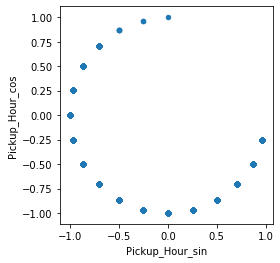

In [105]:
df.plot.scatter('Pickup_Hour_sin', 'Pickup_Hour_cos').set_aspect('equal')


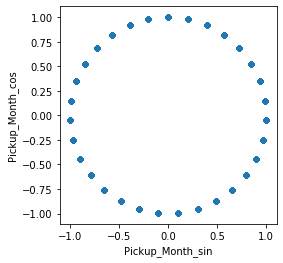

In [106]:
df.plot.scatter('Pickup_Month_sin', 'Pickup_Month_cos').set_aspect('equal')


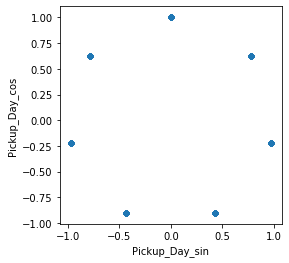

In [107]:
df.plot.scatter('Pickup_Day_sin', 'Pickup_Day_cos').set_aspect('equal')


The newly created features, can now be used by our machine learning algorithms. As an added benefit, their range is extended to [-1, 1], which also supports our predictions.

In [197]:
print(df.columns)


Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_Day_of_Month', 'Pickup_Day_of_Weekday', 'Pickup_-_Time',
       'Distance_(KM)', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings', 'Pickup_Hour',
       'Time_from_Placement_to_Confirmation',
       'Time_from_Confirmation_to_Arrival_at_Pickup',
       'Time_from_Arrival_at_Pickup_to_Pickup_-_Time', 'Performance',
       'Pickup_Minute', 'Pickup_Second', 'Pickup_Hour_sin', 'Pickup_Hour_cos',
       'Pickup_Month_sin', 'Pickup_Month_cos', 'Pickup_Day_sin',
       'Picku

## 4.4 Checking for Multicollinearity

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

This is done through the use of variance inflation factor from the statsmodels package.

In [198]:
def calculate_vif(df):
    '''
    Defining a function that takes in a dataframe,
    then extracts the variables in the dataframe
    and calculates their variance inflation factor by
    iterating over every variable
    
    Parameter:
        df: A dataframe
    Return:
        A dataframe
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vf = variance_inflation_factor
    vif["VIF"] = [vf(df.values, i) for i in range(df.shape[1])]

    return(vif)


In [199]:
# execution of the variance inflation factor
calculate_vif(df.select_dtypes(include=[np.number]))


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Platform_Type,2.236549e+01
1,Placement_-_Day_of_Month,inf
2,Placement_-_Weekday_(Mo_=_1),inf
3,Confirmation_-_Day_of_Month,inf
4,Confirmation_-_Weekday_(Mo_=_1),inf
5,Arrival_at_Pickup_-_Day_of_Month,inf
6,Arrival_at_Pickup_-_Weekday_(Mo_=_1),inf
7,Pickup_Day_of_Month,inf
8,Pickup_Day_of_Weekday,inf
9,Distance_(KM),4.015024e+00


In [200]:
calculate_vif(df[['Distance_(KM)', 'Temperature', 'No_of_Ratings',
              'Time_from_Placement_to_Confirmation',
                  'Time_from_Confirmation_to_Arrival_at_Pickup',
                  'Time_from_Arrival_at_Pickup_to_Pickup_-_Time',
                  'Performance']])

,variables,VIF
0,Distance_(KM),3.794849
1,Temperature,5.976049
2,No_of_Ratings,1.739722
3,Time_from_Placement_to_Confirmation,1.185077
4,Time_from_Confirmation_to_Arrival_at_Pickup,2.296209
5,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,1.990609
6,Performance,1.139649


In [77]:
df.corr()


,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_Day_of_Month,Pickup_Day_of_Weekday,Distance_(KM),...,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Pickup_Minute,Pickup_Second,Performance,Pickup_Hour_sin,Pickup_Hour_cos,Pickup_Month_sin,Pickup_Month_cos,Pickup_Day_sin,Pickup_Day_cos
Platform_Type,1.000000,0.013958,-0.058637,0.013963,-0.058612,0.013963,-0.058612,0.013963,-0.058612,0.005981,...,0.054311,0.004333,-0.002927,-0.049527,0.010075,-0.087143,0.000475,-0.002439,0.038954,-0.053346
Placement_-_Day_of_Month,0.013958,1.000000,0.023910,0.999999,0.023890,0.999999,0.023890,0.999999,0.023890,-0.001978,...,0.005910,-0.000030,-0.009279,0.001369,-0.007505,-0.004736,-0.801744,0.082259,-0.016598,-0.043380
Placement_-_Weekday_(Mo_=_1),-0.058637,0.023910,1.000000,0.023898,0.999964,0.023898,0.999964,0.023898,0.999964,0.009394,...,0.007390,0.001218,0.014577,0.014019,0.017466,0.019726,-0.024962,0.007010,-0.908539,-0.251422
Confirmation_-_Day_of_Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,-0.001979,...,0.005912,-0.000026,-0.009266,0.001366,-0.007508,-0.004744,-0.801744,0.082245,-0.016598,-0.043388
Confirmation_-_Weekday_(Mo_=_1),-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.009388,...,0.007403,0.001242,0.014653,0.014003,0.017446,0.019685,-0.024951,0.006928,-0.908573,-0.251477
Arrival_at_Pickup_-_Day_of_Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,-0.001979,...,0.005912,-0.000026,-0.009266,0.001366,-0.007508,-0.004744,-0.801744,0.082245,-0.016598,-0.043388
Arrival_at_Pickup_-_Weekday_(Mo_=_1),-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.009388,...,0.007403,0.001242,0.014653,0.014003,0.017446,0.019685,-0.024951,0.006928,-0.908573,-0.251477
Pickup_Day_of_Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,-0.001979,...,0.005912,-0.000026,-0.009266,0.001366,-0.007508,-0.004744,-0.801744,0.082245,-0.016598,-0.043388
Pickup_Day_of_Weekday,-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.009388,...,0.007403,0.001242,0.014653,0.014003,0.017446,0.019685,-0.024951,0.006928,-0.908573,-0.251477
Distance_(KM),0.005981,-0.001978,0.009394,-0.001979,0.009388,-0.001979,0.009388,-0.001979,0.009388,1.000000,...,0.100902,0.010383,0.001350,-0.013971,0.034066,-0.036656,0.009171,-0.000195,-0.000579,0.016388


## 4.5 Dropping co-linear and unwanted variables

In [201]:
df = df.drop(['Placement_-_Day_of_Month', 'Placement_-_Weekday_(Mo_=_1)',
              'Placement_-_Time', 'Confirmation_-_Day_of_Month',
              'Confirmation_-_Weekday_(Mo_=_1)', 'Confirmation_-_Time',
              'Arrival_at_Pickup_-_Day_of_Month',
              'Arrival_at_Pickup_-_Weekday_(Mo_=_1)',
              'Arrival_at_Pickup_-_Time', 'Pickup_Day_of_Month',
              'Pickup_Day_of_Weekday', 'Pickup_-_Time'], axis=1)


In [202]:
df_final = df.drop(['Pickup_Hour', 'Pickup_Minute', 'Pickup_Second',
                    'Rider_Id', 'Order_No', 'User_Id', 'Vehicle_Type'], axis=1)
df_final.columns


Index(['Platform_Type', 'Personal_or_Business', 'Distance_(KM)', 'Temperature',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Time_from_Placement_to_Confirmation',
       'Time_from_Confirmation_to_Arrival_at_Pickup',
       'Time_from_Arrival_at_Pickup_to_Pickup_-_Time', 'Performance',
       'Pickup_Hour_sin', 'Pickup_Hour_cos', 'Pickup_Month_sin',
       'Pickup_Month_cos', 'Pickup_Day_sin', 'Pickup_Day_cos'],
      dtype='object')

## 4.6 Dummying out the last categorical column

Below we make use of pd.get_dummies() in our df_final dataframe to convert categorical variables into dummy/indicator variables. A dummy variable (aka, an indicator variable) is a numeric variable that represents categorical data. It takes only the value 0 or 1 to indicate the absence or presence of some categorical data.

In [203]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()


,Platform_Type,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,...,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Performance,Pickup_Hour_sin,Pickup_Hour_cos,Pickup_Month_sin,Pickup_Month_cos,Pickup_Day_sin,Pickup_Day_cos,Personal_or_Business_Personal
0,3,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,...,1477,1363,0.799633,5.000000e-01,-0.866025,0.968077,-0.250653,-0.974928,-0.222521,0
1,3,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,...,1021,227,0.856061,2.588190e-01,-0.965926,0.651372,-0.758758,-0.974928,-0.222521,1
2,3,3,23.255689,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,...,410,209,0.236559,1.224647e-16,-1.000000,-0.201299,0.979530,0.974928,-0.222521,0
3,3,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,...,711,310,0.319413,7.071068e-01,-0.707107,0.101168,-0.994869,-0.974928,-0.222521,0
4,1,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,...,455,90,0.377326,5.000000e-01,-0.866025,0.485302,-0.874347,0.781831,0.623490,1


In [81]:
df_final.columns


Index(['Platform_Type', 'Distance_(KM)', 'Temperature', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings',
       'Time_from_Placement_to_Confirmation',
       'Time_from_Confirmation_to_Arrival_at_Pickup',
       'Time_from_Arrival_at_Pickup_to_Pickup_-_Time', 'Performance',
       'Pickup_Hour_sin', 'Pickup_Hour_cos', 'Pickup_Month_sin',
       'Pickup_Month_cos', 'Pickup_Day_sin', 'Pickup_Day_cos',
       'Personal_or_Business_Personal', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Week_Week 2',
       'Week_Week 3', 'Week_Week 4', 'Week_Week 5',
       'Period_of_the_Day_Evening', 'Period_of_the_Day_Midnight',
       'Period_of_the_Day_Morning', 'Period_of_the_Day_Night'],
      dtype='object')

## 4.6.1 Scaling of dataset

Feature scaling is a method that is used to normalize the range of independent variables/features of data. StandardScaler() transforms our dataframe such that its distribution will have a mean value of 0 and standard deviation of 1.
Below we scale the df_final dataframe to normalise the range of independent variables of the dataframe.

In [204]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(df_final)

df_final = pd.DataFrame(x_scaled, columns=df_final.columns)


## 4.7 Splitting our dataset again into Train and Validation Test

Here we aim to split the dataset into our train and validation test once more, after successfully scaling it.

In [209]:
finaltrain = df_final[:len(train_df)]
finaltest = df_final[len(train_df):]
y = y_target

In [84]:
finaltrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Platform_Type                                 21201 non-null  float64
 1   Distance_(KM)                                 21201 non-null  float64
 2   Temperature                                   21201 non-null  float64
 3   Pickup_Lat                                    21201 non-null  float64
 4   Pickup_Long                                   21201 non-null  float64
 5   Destination_Lat                               21201 non-null  float64
 6   Destination_Long                              21201 non-null  float64
 7   No_Of_Orders                                  21201 non-null  float64
 8   Age                                           21201 non-null  float64
 9   Average_Rating                                21201 non-null 

### Train and Test Split - Using test here as validation

In [210]:
x_train, x_val, y_train, y_val = train_test_split(finaltrain, y, test_size=0.3)


In [211]:
x_train.head()


,Platform_Type,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,No_Of_Orders,Age,Average_Rating,...,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup_-_Time,Performance,Pickup_Hour_sin,Pickup_Hour_cos,Pickup_Month_sin,Pickup_Month_cos,Pickup_Day_sin,Pickup_Day_cos,Personal_or_Business_Personal
15231,0.396621,-0.973256,1.443349e+00,-1.355205,0.516274,-0.516395,0.416364,0.648212,0.567788,0.352922,...,0.042004,-0.233682,-0.208185,-0.157040,-0.750920,-0.860949,1.199058,-0.687765,-1.062780,-0.469452
15997,0.396621,-0.619000,9.771824e-01,1.013099,-0.577439,0.318441,0.374157,0.386263,0.143680,0.241701,...,-0.262162,-0.252170,-0.216383,-0.157040,-0.750920,-1.416787,-0.334375,0.928112,1.493815,-0.469452
16124,0.396621,-0.796128,3.091493e-14,0.585499,-0.484887,0.605438,0.009586,-0.133856,-0.817835,0.352922,...,-1.075697,-0.150489,-0.260523,1.219581,-0.355133,-1.249489,0.781429,-1.406898,0.075012,-0.469452
13593,0.396621,-0.441871,6.042489e-01,0.763315,-0.171155,1.648872,-0.060708,-0.762911,-0.655541,-0.203183,...,-1.107714,-0.303670,-0.031127,-0.594582,-0.355133,-0.860949,1.199058,-1.406898,0.075012,-0.469452
19511,0.396621,0.975155,-5.456291e-01,-1.601958,1.584258,-0.887385,2.284117,1.301194,2.098862,-0.314404,...,2.497162,2.218533,-0.173304,0.312499,-0.885916,-0.613135,1.339596,-0.687765,-1.062780,-0.469452


In [87]:
x_train.columns


Index(['Platform_Type', 'Distance_(KM)', 'Temperature', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings',
       'Time_from_Placement_to_Confirmation',
       'Time_from_Confirmation_to_Arrival_at_Pickup',
       'Time_from_Arrival_at_Pickup_to_Pickup_-_Time', 'Performance',
       'Pickup_Hour_sin', 'Pickup_Hour_cos', 'Pickup_Month_sin',
       'Pickup_Month_cos', 'Pickup_Day_sin', 'Pickup_Day_cos',
       'Personal_or_Business_Personal', 'Day_of_Week_Monday',
       'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Week_Week 2',
       'Week_Week 3', 'Week_Week 4', 'Week_Week 5',
       'Period_of_the_Day_Evening', 'Period_of_the_Day_Midnight',
       'Period_of_the_Day_Morning', 'Period_of_the_Day_Night'],
      dtype='object')

# 5. Model Fitting

## 5.1 Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0)


<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

In [212]:
lr = LinearRegression()
lr.fit(x_train, y_train)
val_preds = lr.predict(x_val)


## 5.2 Lasso Regression

The LASSO (Least Absolute Shrinkage and Selection Operator) is a type of linear regression method that uses shrinkage.  Shrinkage is where data values are shrunk towards a central point, like the mean.
The lasso procedure encourages models with fewer parameters.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/411/1*Yu3iBnyHL7skNiidHxmEGQ.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

In [213]:
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.8)

# train the LASSO model
lasso.fit(x_train, y_train)

# make training set predictions for each model
train_lasso = lasso.predict(x_val)


## 5.3 Ridge Regression

Ridge Regression is a technique that is used for analyzing multiple regression data that suffer from multicollinearity.
Multicollinearity occurs when predictor variables exhibit a correlation among themselves. Ridge regression aims at reducing the standard error by adding some bias in the estimates of the regression. The reduction of the standard error in regression estimates significantly increases the reliability of the estimates.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/411/1*Yu3iBnyHL7skNiidHxmEGQ.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

In [214]:
# create ridge model
ridge = Ridge()

# train the model
ridge.fit(x_train, y_train)

# check training accuracy
train_ridge = ridge.predict(x_val)


## 5.4 Decision Tree

Decision Trees are machine learning models that build regression or classification models in the form of a tree structure.
A Decision Tree is a predictive model that makes use of a set of binary rules in order to calculate the dependent variable. Each tree consists of branches, nodes, and leaves. A Decision Tree imposes a series of questions to the data, each question narrowing possible values, until the model is trained well to make predictions. These questions are determined completely by the model, including their content and order, and are asked in a True/False form.




<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/573/1*RHN0lpDR96nsklb8b0YNNg.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

In [215]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

# train the model
regr_tree.fit(x_train, y_train)

# check training accuracy
train_tree = regr_tree.predict(x_val)


## 5.5 Random Forest

A random forest model is a classification model that is made up of multiple small decision trees, called estimators, which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction is more accurate than that of any individual tree.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>

In [216]:
# Instantiate random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5)

# train the model
rf.fit(x_train, y_train.ravel())

# check training accuracy
train_rf = rf.predict(x_val)


## 5.6 Catboost

CatBoost is a recently open-sourced machine learning algorithm from Yandex.
It yields good results without extensive data training typically required by other machine learning methods.



In [217]:
params = {
    'n_estimators': [300],
    'max_depth': [4],
    'learning_rate': [0.15],
    'colsample_bylevel': [0.5],
    'l2_leaf_reg': [6]}

cbr = GridSearchCV(CatBoostRegressor(random_state=50),
                   cv=2, scoring='neg_mean_squared_error',
                   param_grid=params)
cbrm = cbr.fit(x_train, y_train)


0:	learn: 945.6038810	total: 72.2ms	remaining: 21.6s
1:	learn: 914.4695621	total: 79.8ms	remaining: 11.9s
2:	learn: 884.4980091	total: 89.6ms	remaining: 8.87s
3:	learn: 862.7697124	total: 97.1ms	remaining: 7.19s
4:	learn: 846.5502631	total: 105ms	remaining: 6.19s
5:	learn: 835.7738635	total: 113ms	remaining: 5.53s
6:	learn: 826.7950530	total: 122ms	remaining: 5.12s
7:	learn: 814.6003789	total: 130ms	remaining: 4.75s
8:	learn: 805.5075265	total: 138ms	remaining: 4.46s
9:	learn: 798.0589824	total: 144ms	remaining: 4.18s
10:	learn: 790.5043236	total: 152ms	remaining: 3.99s
11:	learn: 784.6024639	total: 158ms	remaining: 3.79s
12:	learn: 781.4589397	total: 167ms	remaining: 3.69s
13:	learn: 778.2238558	total: 178ms	remaining: 3.63s
14:	learn: 775.0562052	total: 186ms	remaining: 3.54s
15:	learn: 772.3086470	total: 200ms	remaining: 3.56s
16:	learn: 768.6751579	total: 208ms	remaining: 3.46s
17:	learn: 765.9797235	total: 217ms	remaining: 3.4s
18:	learn: 764.1436059	total: 224ms	remaining: 3.31s


169:	learn: 683.7661912	total: 2.1s	remaining: 1.61s
170:	learn: 683.3019258	total: 2.12s	remaining: 1.6s
171:	learn: 683.0284507	total: 2.13s	remaining: 1.58s
172:	learn: 682.6411491	total: 2.15s	remaining: 1.58s
173:	learn: 682.5565607	total: 2.17s	remaining: 1.57s
174:	learn: 682.1698065	total: 2.18s	remaining: 1.56s
175:	learn: 681.8021640	total: 2.2s	remaining: 1.55s
176:	learn: 681.0757794	total: 2.21s	remaining: 1.53s
177:	learn: 680.6953188	total: 2.22s	remaining: 1.52s
178:	learn: 680.4105106	total: 2.23s	remaining: 1.5s
179:	learn: 680.1978765	total: 2.24s	remaining: 1.49s
180:	learn: 679.8894276	total: 2.24s	remaining: 1.48s
181:	learn: 679.5240836	total: 2.26s	remaining: 1.47s
182:	learn: 679.0838812	total: 2.27s	remaining: 1.45s
183:	learn: 678.5328888	total: 2.28s	remaining: 1.44s
184:	learn: 678.2633977	total: 2.29s	remaining: 1.42s
185:	learn: 677.7880139	total: 2.3s	remaining: 1.41s
186:	learn: 677.3339631	total: 2.31s	remaining: 1.4s
187:	learn: 677.0182093	total: 2.3

32:	learn: 778.9498126	total: 362ms	remaining: 2.93s
33:	learn: 778.2535759	total: 371ms	remaining: 2.9s
34:	learn: 776.6308707	total: 379ms	remaining: 2.87s
35:	learn: 775.9564605	total: 390ms	remaining: 2.86s
36:	learn: 775.2861750	total: 400ms	remaining: 2.84s
37:	learn: 773.5011159	total: 410ms	remaining: 2.82s
38:	learn: 773.1623645	total: 419ms	remaining: 2.8s
39:	learn: 771.8551119	total: 437ms	remaining: 2.84s
40:	learn: 771.2698876	total: 446ms	remaining: 2.82s
41:	learn: 770.7246700	total: 460ms	remaining: 2.83s
42:	learn: 770.1607717	total: 474ms	remaining: 2.83s
43:	learn: 769.6199856	total: 485ms	remaining: 2.82s
44:	learn: 767.9663959	total: 500ms	remaining: 2.83s
45:	learn: 767.2891552	total: 509ms	remaining: 2.81s
46:	learn: 766.6509237	total: 518ms	remaining: 2.79s
47:	learn: 766.1946949	total: 537ms	remaining: 2.82s
48:	learn: 765.7500271	total: 546ms	remaining: 2.8s
49:	learn: 765.3500324	total: 555ms	remaining: 2.77s
50:	learn: 764.8559751	total: 565ms	remaining: 2.

201:	learn: 697.5144977	total: 2.2s	remaining: 1.07s
202:	learn: 696.9382555	total: 2.22s	remaining: 1.06s
203:	learn: 696.6138913	total: 2.25s	remaining: 1.06s
204:	learn: 696.2564028	total: 2.26s	remaining: 1.05s
205:	learn: 695.9921800	total: 2.27s	remaining: 1.03s
206:	learn: 695.3832499	total: 2.28s	remaining: 1.02s
207:	learn: 695.2106991	total: 2.29s	remaining: 1.01s
208:	learn: 695.0854346	total: 2.31s	remaining: 1s
209:	learn: 695.0297616	total: 2.32s	remaining: 993ms
210:	learn: 694.6683389	total: 2.32s	remaining: 980ms
211:	learn: 694.3618068	total: 2.34s	remaining: 971ms
212:	learn: 693.9832490	total: 2.35s	remaining: 960ms
213:	learn: 693.7124573	total: 2.36s	remaining: 949ms
214:	learn: 693.3983028	total: 2.38s	remaining: 942ms
215:	learn: 693.1133783	total: 2.39s	remaining: 930ms
216:	learn: 692.7282991	total: 2.41s	remaining: 921ms
217:	learn: 692.3053960	total: 2.42s	remaining: 909ms
218:	learn: 691.9848623	total: 2.43s	remaining: 898ms
219:	learn: 691.6088457	total: 2

60:	learn: 751.1531103	total: 1.11s	remaining: 4.34s
61:	learn: 750.8630573	total: 1.14s	remaining: 4.36s
62:	learn: 750.4053405	total: 1.15s	remaining: 4.33s
63:	learn: 749.8480359	total: 1.17s	remaining: 4.3s
64:	learn: 749.4587928	total: 1.2s	remaining: 4.32s
65:	learn: 748.7516605	total: 1.21s	remaining: 4.28s
66:	learn: 747.9930559	total: 1.23s	remaining: 4.26s
67:	learn: 747.4885021	total: 1.25s	remaining: 4.26s
68:	learn: 747.0743592	total: 1.26s	remaining: 4.22s
69:	learn: 746.4416782	total: 1.29s	remaining: 4.26s
70:	learn: 745.9106483	total: 1.32s	remaining: 4.25s
71:	learn: 745.5867476	total: 1.34s	remaining: 4.25s
72:	learn: 745.1199232	total: 1.35s	remaining: 4.21s
73:	learn: 744.5137274	total: 1.37s	remaining: 4.19s
74:	learn: 744.2440249	total: 1.39s	remaining: 4.18s
75:	learn: 743.8481314	total: 1.41s	remaining: 4.17s
76:	learn: 743.3227748	total: 1.43s	remaining: 4.14s
77:	learn: 743.0953644	total: 1.45s	remaining: 4.12s
78:	learn: 742.7728713	total: 1.48s	remaining: 4

216:	learn: 706.6609683	total: 4.94s	remaining: 1.89s
217:	learn: 706.4615918	total: 4.96s	remaining: 1.86s
218:	learn: 706.2516289	total: 5s	remaining: 1.85s
219:	learn: 705.9164683	total: 5.01s	remaining: 1.82s
220:	learn: 705.6320880	total: 5.04s	remaining: 1.8s
221:	learn: 705.4540324	total: 5.06s	remaining: 1.78s
222:	learn: 705.3111461	total: 5.08s	remaining: 1.75s
223:	learn: 705.1539708	total: 5.12s	remaining: 1.74s
224:	learn: 704.8744926	total: 5.15s	remaining: 1.72s
225:	learn: 704.6985832	total: 5.17s	remaining: 1.69s
226:	learn: 704.4915969	total: 5.22s	remaining: 1.68s
227:	learn: 704.2482388	total: 5.24s	remaining: 1.66s
228:	learn: 703.9319743	total: 5.26s	remaining: 1.63s
229:	learn: 703.5686995	total: 5.31s	remaining: 1.61s
230:	learn: 703.3325346	total: 5.35s	remaining: 1.6s
231:	learn: 703.1037243	total: 5.38s	remaining: 1.58s
232:	learn: 702.9258004	total: 5.39s	remaining: 1.55s
233:	learn: 702.8012608	total: 5.41s	remaining: 1.53s
234:	learn: 702.6151299	total: 5.

In [218]:
train_cbrm = cbrm.predict(x_val)

## 5.7 XGBoost

XGBoost is a software library that stands for extreme gradient boosting.XGBoost focuses on computational speed and model performance, offering optimization features such as Gradient Boosting, Stochastic Gradient Boosting, and Regularized Gradient Boosting.

In [219]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

# fitting our model to the training dataset

regressor.fit(x_train, y_train)

# checking training accuracy

train_xgb = regressor.predict(x_val)


# **6. Model Evaluation**

### Checking the RMSE of the validation prediction

In [220]:
def rmse(y_test, y_predict):
    '''
    The function takes in two series
    and returns the root mean squared
    error as a float
    Parameter:
        y_test: Series
                the first value
        y_predict: Series
                    the second value
    Returns:
        Returns a float
    '''
    return np.sqrt(mean_squared_error(y_test, y_predict))


## 6.1 Linear Regression 

In [221]:
rmse(y_val, val_preds)


772.1262499469188

## 6.2 Lasso Regression 

In [222]:
rmse(y_val, train_lasso)


772.0019752889789

## 6.3 Ridge Regression 

In [223]:
rmse(y_val, train_ridge)


772.1262546219169

## 6.4 Decision Tree

In [224]:
rmse(y_val, train_tree)


785.453952399165

## 6.5 Random Forest

In [225]:
rmse(y_val, train_rf)


767.2752538536242

## 6.6 Catboost

In [226]:
rmse(y_val, train_cbrm)


731.4886061697107

## 6.7 XGBoost

In [227]:
rmse(y_val, train_xgb)


737.3636626320645

# **7. Model Analysis**

### Making prediction on the test set

## 7.1 Linear Regression

In [228]:
y_pred = lr.predict(finaltest)


## 7.2 Lasso Regression

In [229]:
lasso_y_pred = lasso.predict(finaltest)


## 7.3 Ridge Regression

In [230]:
ridge_y_pred = ridge.predict(finaltest)


## 7.4 Decision Tree

In [231]:
tree_y_pred = ridge.predict(finaltest)


## 7.5 Random Forest

In [232]:
rf_y_pred = rf.predict(finaltest)


## 7.6 Catboost

In [233]:
cb_y_pred = cbrm.predict(finaltest)


## 7.7 XGBoost

In [235]:
regressor_y_pred = regressor.predict(finaltest)


# 8. Conclusion

* The dataset contains missing values in two columns, one of the columns (Temperature) was imputed with its mean while Precipitation in millimeters was dropped from the model building
* Most order were done by business customers and they occurred during the business working days (Monday to Friday)
* Majority of the customers prefers making their orders during the day (morning and afternoon)
* Delays in delivery of order are impacted most times as a result of traffic during these business hours as these are peak periods of the day
* Temperature also plays a significant role in delivery of orders
* There is a high volume of orders during the first week of the month. This can be attributed to the fact that customers are stocking up for the upcoming months
* Decline was noticed on the first and last day of the month. This could be as a result of business wanting to place orders during the end or beginning of the month as it is the busiest time of the month when majority of workers recently got paid. This is a way of them avoiding traffic.
* Distance is a contributory factor to order delivery
* CatBoost was the best fitted model among all fitted models as it yielded the least root mean squared error



# 9. Submission

In [236]:
submission_df = test_df[['Order No']]
submission_df['Time from Pickup to Arrival'] = cb_y_pred

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
submission_file_df = submission_df

In [238]:
submission_df.to_csv("C:/Users/Admin/Downloads/Explore Data Science Academy/Class Begins/Machine Learning/Regression/Predict/Sendy Logistics Challenge/base_prediction_18.csv", index = False)

# 10. Contributors

1. Bukelwa Mqhamane
2. Kolawole Samuel Aina
3. Orline Sorel Ketcha
4. Lancelot Ngobeni

# 10. References

1. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
2. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
3. https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8#:~:text=Drop%20columns%20%3A%20Drop%20columns%20which%20has%20more%20missing%20value.&text=Column%20Score4%20has%20more%20null,%25%20missing%20value%2C%20drop%20it.
4. https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db
5. http://blog.davidkaleko.com/feature-engineering-cyclical-features.html#:~:text=Hours%20of%20the%20day%2C%20days,each%20other%20and%20not%20far.
6. https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning